In [1]:
import pandas as pd
import numpy as np
import random as rnd
import pprint
from itertools import cycle, islice
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
mimic = pd.read_csv(r'C:\Users\jeyak\mimic_new.csv', index_col=0)


In [3]:
mimic['NUM_PROCEDURES'] = mimic['NUM_PROCEDURES'].replace(np.inf,0)
mimic['NUM_CPTEVENTS'] = mimic['NUM_CPTEVENTS'].replace(np.inf,0)
mimic['NUM_TRANSFERS'] = mimic['NUM_TRANSFERS'].replace(np.inf,0)
mimic['NUM_LABITEMS'] = mimic['NUM_LABITEMS'].replace(np.inf,0)
mimic['NUM_MICROLABS'] = mimic['NUM_MICROLABS'].replace(np.inf,0)
mimic['NUM_NOTEEVENTS'] = mimic['NUM_NOTEEVENTS'].replace(np.inf,0)
mimic['NUM_OUTPUT'] = mimic['NUM_OUTPUT'].replace(np.inf,0)
mimic['NUM_DIAGNOSIS'] = mimic['NUM_DIAGNOSIS'].replace(np.inf,0)
mimic['TOTAL_EVENTS'] = mimic['TOTAL_EVENTS'].replace(np.inf,0)

mimic['NUM_PROCEDURES'] = mimic['NUM_PROCEDURES'].replace(-np.inf,0)
mimic['NUM_CPTEVENTS'] = mimic['NUM_CPTEVENTS'].replace(-np.inf,0)
mimic['NUM_TRANSFERS'] = mimic['NUM_TRANSFERS'].replace(-np.inf,0)
mimic['NUM_LABITEMS'] = mimic['NUM_LABITEMS'].replace(-np.inf,0)
mimic['NUM_MICROLABS'] = mimic['NUM_MICROLABS'].replace(-np.inf,0)
mimic['NUM_NOTEEVENTS'] = mimic['NUM_NOTEEVENTS'].replace(-np.inf,0)
mimic['NUM_OUTPUT'] = mimic['NUM_OUTPUT'].replace(-np.inf,0)
mimic['NUM_DIAGNOSIS'] = mimic['NUM_DIAGNOSIS'].replace(-np.inf,0)
mimic['TOTAL_EVENTS'] = mimic['TOTAL_EVENTS'].replace(-np.inf,0)


In [4]:
mimic['TOTAL_EVENTS'] = mimic['TOTAL_EVENTS'].fillna(0)

In [5]:
#from autoviz.AutoViz_Class import AutoViz_Class

#AV = AutoViz_Class()

In [6]:
#filename = "mimic.csv"
#sep = ","
#dft = AV.AutoViz(
 #   filename,
  #  sep=",",
   # depVar="",
 #   dfte=None,
  #  header=0,
   # verbose=0,
#    lowess=False,
 #   chart_format="svg",
  #  max_rows_analyzed=150000,
   # max_cols_analyzed=30,
#)

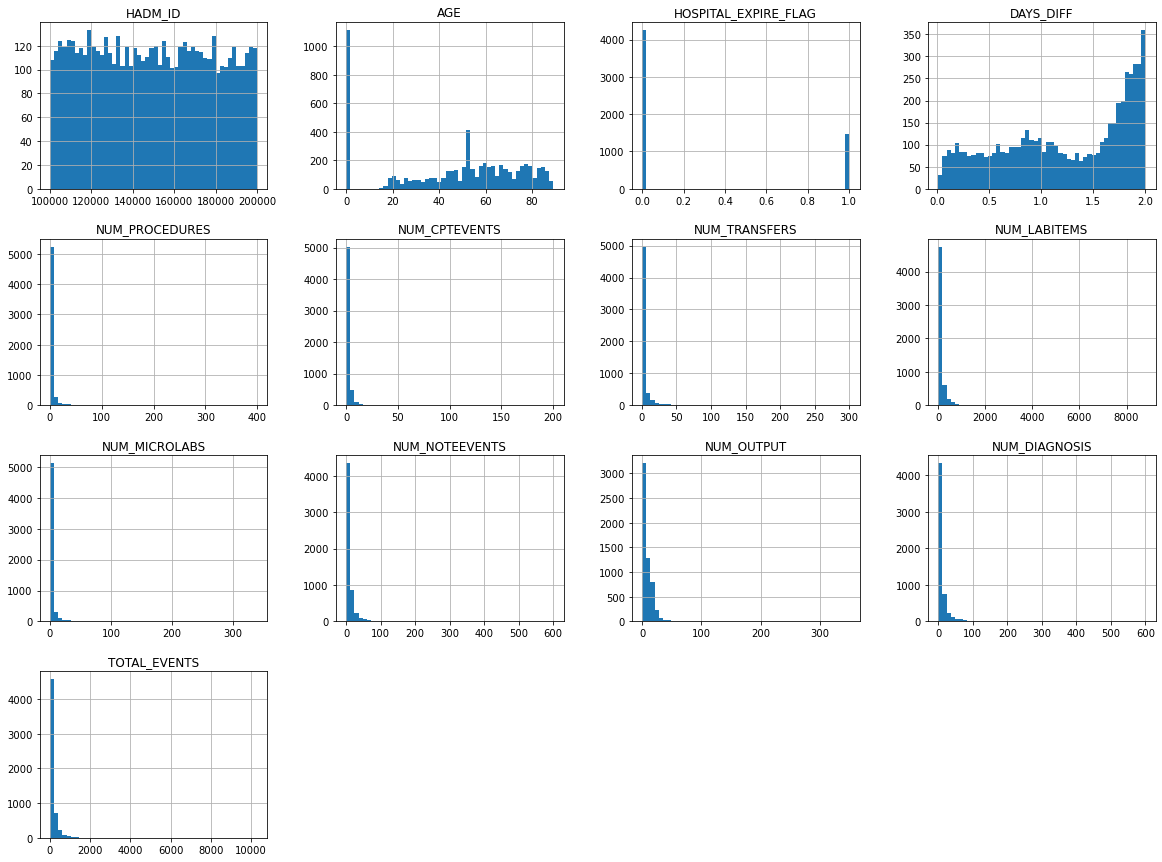

In [7]:
mimic.hist(bins=50, figsize=(20,15))
plt.show()

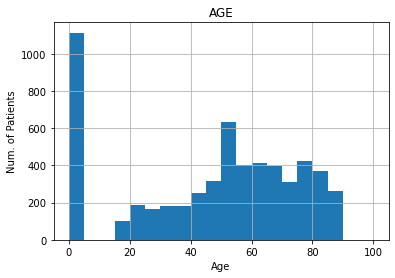

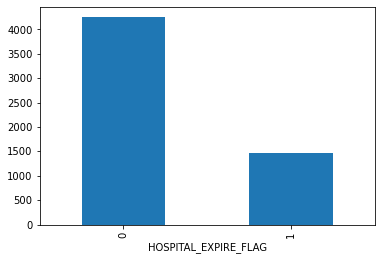

In [8]:
age_histogram = mimic.hist(column='AGE', bins=20, range=[0, 100])
for ax in age_histogram.flatten():
    ax.set_xlabel("Age")
    ax.set_ylabel("Num. of Patients")
plt.show()
mimic.groupby('HOSPITAL_EXPIRE_FLAG').size().plot.bar()
plt.show()

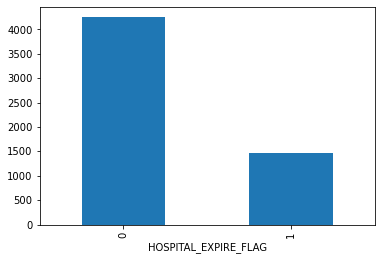

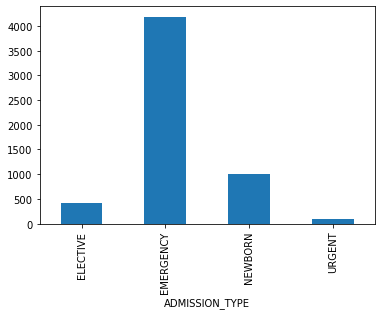

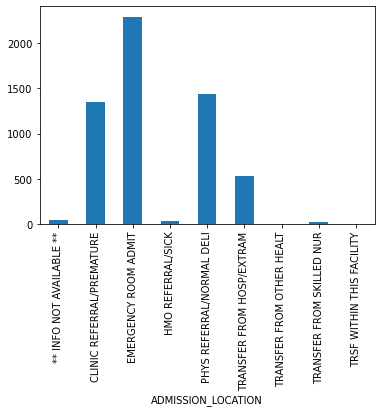

In [9]:
mimic.groupby('HOSPITAL_EXPIRE_FLAG').size().plot.bar()
plt.show()
mimic.groupby('ADMISSION_TYPE').size().plot.bar()
plt.show()
mimic.groupby('ADMISSION_LOCATION').size().plot.bar()
plt.show()

In [10]:
# Label = ExpiredHospital
y = mimic['HOSPITAL_EXPIRE_FLAG']
X = mimic.drop('HOSPITAL_EXPIRE_FLAG', 1)

X = X.drop('DISCHARGE_LOCATION', 1)
X = X.drop('INSURANCE', 1)
X = X.drop('LANGUAGE', 1)
X = X.drop('RELIGION', 1)
X = X.drop('MARITAL_STATUS', 1)
X = X.drop('ETHNICITY', 1)
X = X.drop('DIAGNOSIS', 1)
X = X.drop('ADMIT_PROCEDURE', 1)



print("y - Labels", y.shape)
print("X - No Label  ", X.shape)
print(X.columns)

y - Labels (5710,)
X - No Label   (5710, 15)
Index(['HADM_ID', 'GENDER', 'AGE', 'ADMISSION_TYPE', 'ADMISSION_LOCATION',
       'DAYS_DIFF', 'NUM_PROCEDURES', 'NUM_CPTEVENTS', 'NUM_TRANSFERS',
       'NUM_LABITEMS', 'NUM_MICROLABS', 'NUM_NOTEEVENTS', 'NUM_OUTPUT',
       'NUM_DIAGNOSIS', 'TOTAL_EVENTS'],
      dtype='object')


In [11]:
X.info()
x_desc=X.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5710 entries, 0 to 5709
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   HADM_ID             5710 non-null   int64  
 1   GENDER              5710 non-null   object 
 2   AGE                 5710 non-null   int64  
 3   ADMISSION_TYPE      5710 non-null   object 
 4   ADMISSION_LOCATION  5710 non-null   object 
 5   DAYS_DIFF           5710 non-null   float64
 6   NUM_PROCEDURES      5710 non-null   float64
 7   NUM_CPTEVENTS       5710 non-null   float64
 8   NUM_TRANSFERS       5710 non-null   float64
 9   NUM_LABITEMS        5710 non-null   float64
 10  NUM_MICROLABS       5710 non-null   float64
 11  NUM_NOTEEVENTS      5710 non-null   float64
 12  NUM_OUTPUT          5710 non-null   float64
 13  NUM_DIAGNOSIS       5710 non-null   float64
 14  TOTAL_EVENTS        5710 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 713.8

In [12]:
x_desc

,HADM_ID,AGE,DAYS_DIFF,NUM_PROCEDURES,NUM_CPTEVENTS,NUM_TRANSFERS,NUM_LABITEMS,NUM_MICROLABS,NUM_NOTEEVENTS,NUM_OUTPUT,NUM_DIAGNOSIS,TOTAL_EVENTS
count,5710.000000,5710.000000,5710.000000,5710.000000,5710.000000,5710.000000,5710.000000,5710.000000,5710.000000,5710.000000,5710.000000,5710.000000
mean,149334.708581,46.379685,1.222898,3.489278,2.041441,4.749637,115.615356,3.142692,10.029625,8.421711,12.168058,159.657799
std,28922.647136,28.215256,0.609744,12.705261,5.933425,11.071297,232.724388,11.634061,19.257710,13.149156,24.377689,289.464048
min,100014.000000,0.000000,0.010000,0.000000,0.000000,0.560000,0.000000,0.000000,0.000000,0.000000,0.000000,1.430000
25%,123984.500000,25.000000,0.720000,0.000000,0.000000,1.710000,30.655000,0.000000,2.220000,0.000000,2.910000,53.067500
50%,149036.500000,53.000000,1.300000,1.085000,1.160000,2.250000,60.510000,0.600000,5.260000,5.620000,5.780000,89.820000
75%,174212.250000,69.000000,1.810000,2.917500,2.380000,3.527500,120.000000,2.250000,11.425000,12.417500,11.590000,168.105000
max,199955.000000,89.000000,2.000000,400.000000,200.000000,300.000000,8800.000000,340.000000,600.000000,350.000000,600.000000,10300.000000


In [13]:
x_desc.to_csv("describe.csv")

In [14]:
print(X.shape)
categorical_columns = [
                    'ADMISSION_TYPE',                     
                    'ADMISSION_LOCATION',
                    'GENDER']
for col in categorical_columns:
    #if the original column is present replace it with a one-hot
    n = len(X[col].unique())
    if (n == 2):
        X[col] = pd.get_dummies(X[col], drop_first=True)
        



(5710, 15)


In [15]:
X_onehot = pd.get_dummies(X)
X_onehot

,HADM_ID,GENDER,AGE,DAYS_DIFF,NUM_PROCEDURES,NUM_CPTEVENTS,NUM_TRANSFERS,NUM_LABITEMS,NUM_MICROLABS,NUM_NOTEEVENTS,...,ADMISSION_TYPE_URGENT,ADMISSION_LOCATION_** INFO NOT AVAILABLE **,ADMISSION_LOCATION_CLINIC REFERRAL/PREMATURE,ADMISSION_LOCATION_EMERGENCY ROOM ADMIT,ADMISSION_LOCATION_HMO REFERRAL/SICK,ADMISSION_LOCATION_PHYS REFERRAL/NORMAL DELI,ADMISSION_LOCATION_TRANSFER FROM HOSP/EXTRAM,ADMISSION_LOCATION_TRANSFER FROM OTHER HEALT,ADMISSION_LOCATION_TRANSFER FROM SKILLED NUR,ADMISSION_LOCATION_TRSF WITHIN THIS FACILITY
0,165315,0,64,1.14,2.63,0.00,1.75,79.82,0.88,8.77,...,0,0,0,1,0,0,0,0,0,0
1,115799,1,53,1.97,1.52,1.52,2.03,50.76,0.00,4.06,...,0,0,0,0,0,0,1,0,0,0
2,196503,0,0,1.94,0.52,0.00,2.06,0.00,0.00,1.55,...,0,0,1,0,0,0,0,0,0,0
3,190665,0,64,1.83,2.73,0.00,1.09,26.78,0.00,3.83,...,0,0,1,0,0,0,0,0,0,0
4,198892,0,0,1.98,0.00,0.00,1.52,1.52,0.00,6.06,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5705,182540,0,47,0.33,3.03,0.00,9.09,0.00,0.00,6.06,...,0,0,0,0,0,1,0,0,0,0
5706,127022,0,85,1.94,0.00,1.55,1.03,47.42,2.06,1.55,...,0,0,1,0,0,0,0,0,0,0
5707,105447,1,88,0.66,3.03,4.55,3.03,178.79,9.09,0.00,...,0,0,0,1,0,0,0,0,0,0
5708,101071,0,83,0.55,1.82,0.00,3.64,100.00,1.82,1.82,...,0,0,1,0,0,0,0,0,0,0


In [16]:
X_onehot.to_csv("one_hot.csv")

In [17]:
X_Not_norm = X_onehot.copy()

In [18]:
X_Not_norm.columns

Index(['HADM_ID', 'GENDER', 'AGE', 'DAYS_DIFF', 'NUM_PROCEDURES',
       'NUM_CPTEVENTS', 'NUM_TRANSFERS', 'NUM_LABITEMS', 'NUM_MICROLABS',
       'NUM_NOTEEVENTS', 'NUM_OUTPUT', 'NUM_DIAGNOSIS', 'TOTAL_EVENTS',
       'ADMISSION_TYPE_ELECTIVE', 'ADMISSION_TYPE_EMERGENCY',
       'ADMISSION_TYPE_NEWBORN', 'ADMISSION_TYPE_URGENT',
       'ADMISSION_LOCATION_** INFO NOT AVAILABLE **',
       'ADMISSION_LOCATION_CLINIC REFERRAL/PREMATURE',
       'ADMISSION_LOCATION_EMERGENCY ROOM ADMIT',
       'ADMISSION_LOCATION_HMO REFERRAL/SICK',
       'ADMISSION_LOCATION_PHYS REFERRAL/NORMAL DELI',
       'ADMISSION_LOCATION_TRANSFER FROM HOSP/EXTRAM',
       'ADMISSION_LOCATION_TRANSFER FROM OTHER HEALT',
       'ADMISSION_LOCATION_TRANSFER FROM SKILLED NUR',
       'ADMISSION_LOCATION_TRSF WITHIN THIS FACILITY'],
      dtype='object')

In [19]:
from sklearn import preprocessing

x = X_Not_norm.values #returns a numpy array
scaler = preprocessing.StandardScaler()
x_scaled = scaler.fit_transform(x)
XNorm = pd.DataFrame(x_scaled, columns=X_Not_norm.columns)
print(XNorm)

       HADM_ID    GENDER       AGE  DAYS_DIFF  NUM_PROCEDURES  NUM_CPTEVENTS  \
0     0.552567 -1.093688  0.624551  -0.135968       -0.067638      -0.344088   
1    -1.159598  0.914337  0.234657   1.225379       -0.155011      -0.087890   
2     1.630986 -1.093688 -1.643924   1.176173       -0.233725      -0.344088   
3     1.429119 -1.093688  0.624551   0.995754       -0.059766      -0.344088   
4     1.713593 -1.093688 -1.643924   1.241780       -0.274657      -0.344088   
...        ...       ...       ...        ...             ...            ...   
5705  1.148173 -1.093688  0.021987  -1.464511       -0.036152      -0.344088   
5706 -0.771529 -1.093688  1.368894   1.176173       -0.274657      -0.082833   
5707 -1.517550  0.914337  1.475229  -0.923253       -0.036152       0.422821   
5708 -1.668863 -1.093688  1.298004  -1.103672       -0.131396      -0.344088   
5709  1.415253 -1.093688  0.589106   0.634915       -0.274657      -0.135084   

      NUM_TRANSFERS  NUM_LABITEMS  NUM_

In [20]:
XNorm.to_csv("norm.csv")

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(XNorm, y, test_size=0.1, random_state=42)
print ('X_train: ', X_train.shape)
print ('X_test: ', X_test.shape)
print ('y_train: ', y_train.shape)
print ('y_test: ', y_test.shape)

X_train:  (5139, 26)
X_test:  (571, 26)
y_train:  (5139,)
y_test:  (571,)


In [54]:
# Test Models and evaluation metric
from sklearn.model_selection import train_test_split
from sklearn import model_selection, preprocessing
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV,KFold, cross_val_predict, StratifiedKFold, train_test_split, learning_curve, ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve, average_precision_score, auc

seed = 7
scoring = 'accuracy' 

# Spot Check Algorithms
Mymodels = []
#Mymodels.append(('LogReg', LogisticRegression()))
Mymodels.append(('RandomForest', RandomForestClassifier()))
#Mymodels.append(('SGDclassifier', SGDClassifier()))
#Mymodels.append(('KNearestNeighbors', KNeighborsClassifier()))
#Mymodels.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
#Mymodels.append(('GaussianNB', GaussianNB()))
#Mymodels.append(('SVM', SVC()))

# Evaluate each model in turn
results = []
names = []
for name, model in Mymodels:
    kfold = model_selection.KFold(n_splits=10, random_state=None,shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg) 

RandomForest: 0.901928 (0.008157)


In [55]:
model = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 50, 100],
    'min_samples_split': [2, 4],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(model, param_grid, cv=5,verbose=5,n_jobs = -1, scoring='accuracy') 
grid_search.fit(XNorm, y)

print(grid_search.best_estimator_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
RandomForestClassifier(max_depth=100, max_features='log2', min_samples_split=4,
                       n_estimators=200)


In [56]:
model_RF = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=50, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [57]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Error")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = 1-np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = 1-np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from 'Z:\\ProgramData\\envs\\Tensorflow\\lib\\site-packages\\matplotlib\\pyplot.py'>

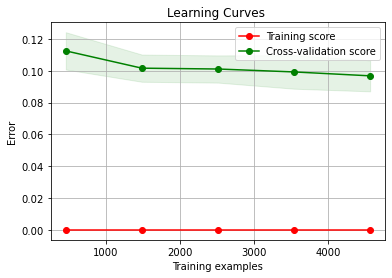

In [58]:

title = "Learning Curves "
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plot_learning_curve(model_RF, title, XNorm, y, cv=cv, n_jobs=5)

In [80]:
model.fit(X_train, y_train)
final_predictions = model.predict(X_test)

#final_acc = accuracy(y_test, final_predictions)
# Confusion matrix

conf_mx = confusion_matrix(y_test, final_predictions)

TP = conf_mx[0,0]
FP = conf_mx[0,1]
FN = conf_mx[1,0]
TN = conf_mx[1,1]

print ('TN: ', TN)
print ('FP: ', FP)
print ('FN: ', FN)
print ('TP: ', TP)

recall = TP/(TP+FN)
precision = TP/(TP+FP)

print (recall, precision)

TN:  101
FP:  19
FN:  48
TP:  403
0.893569844789357 0.9549763033175356


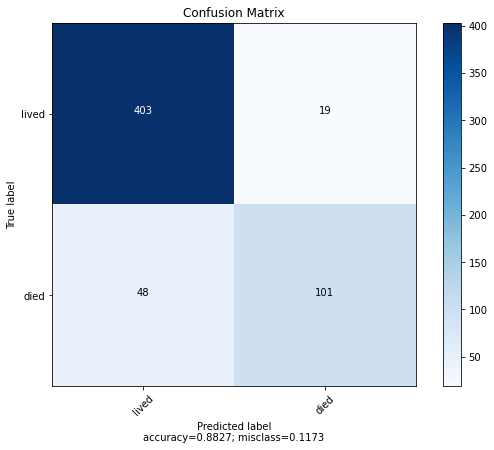

In [76]:
plot_confusion_matrix(conf_mx, 
                      normalize    = False,
                      target_names = ['lived', 'died'],
                      title        = "Confusion Matrix")

In [61]:
seed = 7
scoring = 'accuracy' 

# Spot Check Algorithms
Mymodels = []
Mymodels.append(('LogReg', LogisticRegression()))


# Evaluate each model in turn
results = []
names = []
for name, model in Mymodels:
    kfold = model_selection.KFold(n_splits=10, random_state=None)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg) 

LogReg: 0.885774 (0.014256)


In [62]:
model_LR = LogisticRegression()
param_grid = {'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear']}

# Create grid search object

clf = GridSearchCV(model_LR, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

# Fit on data

best_clf = clf.fit(XNorm, y)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


In [63]:
print(best_clf.best_estimator_)

LogisticRegression(C=0.615848211066026, penalty='l1', solver='liblinear')


In [67]:
model_LR = LogisticRegression(C=11.288378916846883, penalty='l1', solver='liblinear')

<module 'matplotlib.pyplot' from 'Z:\\ProgramData\\envs\\Tensorflow\\lib\\site-packages\\matplotlib\\pyplot.py'>

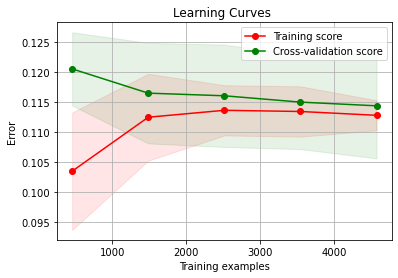

In [65]:
title = "Learning Curves "
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plot_learning_curve(model_LR, title, XNorm, y, cv=cv, n_jobs=5)

In [79]:
model_LR.fit(X_train, y_train)
final_predictions = model_LR.predict(X_test)

#final_acc = accuracy(y_test, final_predictions)
# Confusion matrix

conf_mx = confusion_matrix(y_test, final_predictions)

TP = conf_mx[0,0]
FP = conf_mx[0,1]
FN = conf_mx[1,0]
TN = conf_mx[1,1]

print ('TN: ', TN)
print ('FP: ', FP)
print ('FN: ', FN)
print ('TP: ', TP)

recall = TP/(TP+FN)
precision = TP/(TP+FP)

print (recall, precision)

TN:  101
FP:  19
FN:  48
TP:  403
0.893569844789357 0.9549763033175356


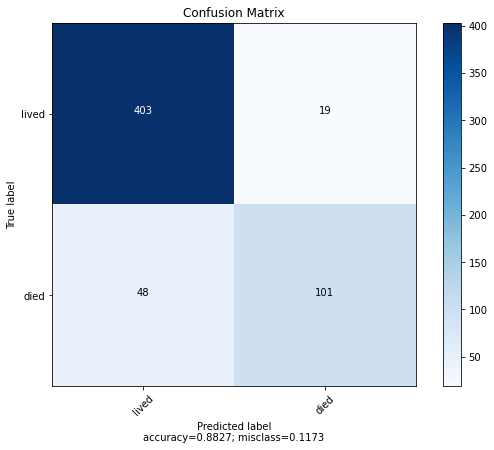

In [81]:
plot_confusion_matrix(conf_mx, 
                      normalize    = False,
                      target_names = ['lived', 'died'],
                      title        = "Confusion Matrix")

In [32]:
seed = 7
scoring = 'accuracy' 

# Spot Check Algorithms
Mymodels = []

Mymodels.append(('KNearestNeighbors', KNeighborsClassifier()))


# Evaluate each model in turn
results = []
names = []
for name, model in Mymodels:
    kfold = model_selection.KFold(n_splits=10, random_state=None,shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg) 

KNearestNeighbors: 0.873127 (0.013616)


In [33]:
model_knn = KNeighborsClassifier()

param_grid ={'n_neighbors': [1, 5, 10, 15, 20, 25, 30], 'p': [1, 2]}

knn = GridSearchCV(model_knn, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)

best_clf = knn.fit(XNorm, y)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


In [34]:
print(best_clf.best_params_)

{'n_neighbors': 5, 'p': 1}


In [35]:
model_Knn = KNeighborsClassifier(n_neighbors=5, p= 1)

<module 'matplotlib.pyplot' from 'Z:\\ProgramData\\envs\\Tensorflow\\lib\\site-packages\\matplotlib\\pyplot.py'>

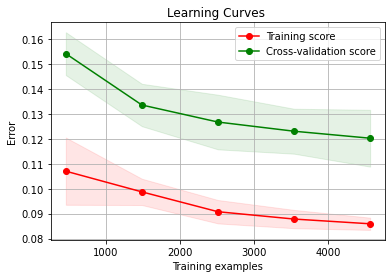

In [36]:
title = "Learning Curves "
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plot_learning_curve(model_Knn, title, XNorm, y, cv=cv, n_jobs=5)

In [82]:
model_Knn.fit(X_train, y_train)
final_predictions = model_Knn.predict(X_test)

#final_acc = accuracy(y_test, final_predictions)
# Confusion matrix

conf_mx = confusion_matrix(y_test, final_predictions)

TP = conf_mx[0,0]
FP = conf_mx[0,1]
FN = conf_mx[1,0]
TN = conf_mx[1,1]

print ('TN: ', TN)
print ('FP: ', FP)
print ('FN: ', FN)
print ('TP: ', TP)

recall = TP/(TP+FN)
precision = TP/(TP+FP)

print (recall, precision)

TN:  96
FP:  18
FN:  53
TP:  404
0.8840262582056893 0.957345971563981


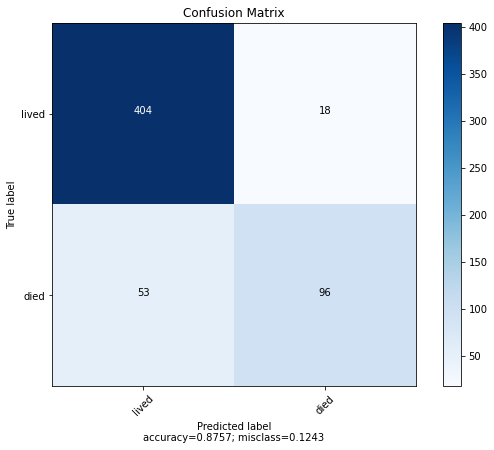

In [83]:
plot_confusion_matrix(conf_mx, 
                      normalize    = False,
                      target_names = ['lived', 'died'],
                      title        = "Confusion Matrix")

In [37]:
seed = 7
scoring = 'accuracy' 

# Spot Check Algorithms
Mymodels = []
Mymodels.append(('DecisionTreeClassifier', DecisionTreeClassifier()))

# Evaluate each model in turn
results = []
names = []
for name, model in Mymodels:
    kfold = model_selection.KFold(n_splits=10, random_state=None,shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg) 

DecisionTreeClassifier: 0.856585 (0.009440)


In [38]:
df_classifier = DecisionTreeClassifier(random_state=999)

params_grid = {'max_depth': [3,4,5,6],
             'min_samples_split': [3,6,9,10,15]}

In [39]:
model_DT = GridSearchCV(df_classifier, param_grid = params_grid, cv = 5, verbose=True, n_jobs=-1)

best_DT = model_DT.fit(XNorm, y)
print(best_DT.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
{'max_depth': 4, 'min_samples_split': 3}


<module 'matplotlib.pyplot' from 'Z:\\ProgramData\\envs\\Tensorflow\\lib\\site-packages\\matplotlib\\pyplot.py'>

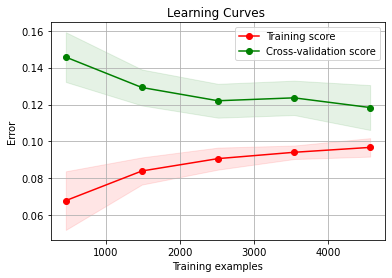

In [40]:
model_DT = DecisionTreeClassifier(max_depth=5, min_samples_split= 15)
title = "Learning Curves "
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plot_learning_curve(model_DT, title, XNorm, y, cv=cv, n_jobs=5)

In [84]:
model_DT.fit(X_train, y_train)
final_predictions = model_DT.predict(X_test)

#final_acc = accuracy(y_test, final_predictions)
# Confusion matrix

conf_mx = confusion_matrix(y_test, final_predictions)

TP = conf_mx[0,0]
FP = conf_mx[0,1]
FN = conf_mx[1,0]
TN = conf_mx[1,1]

print ('TN: ', TN)
print ('FP: ', FP)
print ('FN: ', FN)
print ('TP: ', TP)

recall = TP/(TP+FN)
precision = TP/(TP+FP)

print (recall, precision)

TN:  100
FP:  15
FN:  49
TP:  407
0.8925438596491229 0.9644549763033176


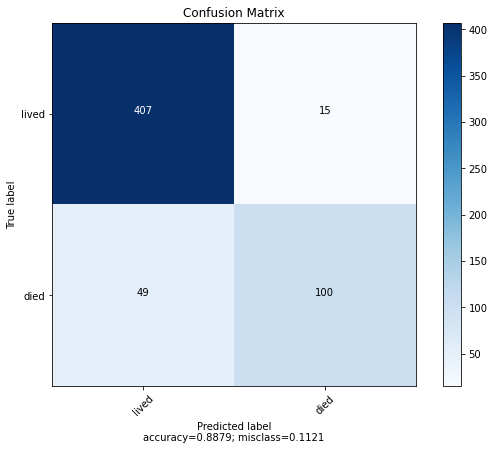

In [85]:
plot_confusion_matrix(conf_mx, 
                      normalize    = False,
                      target_names = ['lived', 'died'],
                      title        = "Confusion Matrix")

In [41]:
import tensorflow as tf
from keras import models, regularizers, layers, optimizers, losses, metrics
from keras.models import Sequential
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dense
from keras.utils import np_utils

model = models.Sequential()
model.add(layers.Dense(2048, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(26,)))
#model.add(layers.BatchNormalization())
model.add(layers.Dense(2048, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2048, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
print(model.summary())

model = Sequential()
model.add(Dense(12, input_dim=26, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# FIT / TRAIN model

NumEpochs = 100
BatchSize = 16

model.compile(optimizer=optimizers.Adam(lr=1e-5), loss='binary_crossentropy', metrics=['binary_accuracy'])
history = model.fit(X_train, y_train, epochs=NumEpochs, batch_size=BatchSize, validation_data=(X_test, y_test))

results = model.evaluate(X_test, y_test)
print("_"*100)
print("Test Loss and Accuracy")
print("results ", results)
history_dict = history.history
history_dict.keys()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2048)              55296     
_________________________________________________________________
dense_1 (Dense)              (None, 2048)              4196352   
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 2048)              4196352   
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 2049      
Total params: 8,450,049
Trainable params: 8,450,049
Non-trainable params: 0
______________________________________________

322/322 [==============================] - 0s 704us/step - loss: 0.4459 - binary_accuracy: 0.8196 - val_loss: 0.4522 - val_binary_accuracy: 0.8109
Epoch 46/100
322/322 [==============================] - 0s 705us/step - loss: 0.4425 - binary_accuracy: 0.8210 - val_loss: 0.4492 - val_binary_accuracy: 0.8091
Epoch 47/100
322/322 [==============================] - 0s 657us/step - loss: 0.4391 - binary_accuracy: 0.8227 - val_loss: 0.4462 - val_binary_accuracy: 0.8126
Epoch 48/100
322/322 [==============================] - 0s 670us/step - loss: 0.4359 - binary_accuracy: 0.8247 - val_loss: 0.4433 - val_binary_accuracy: 0.8126
Epoch 49/100
322/322 [==============================] - 0s 677us/step - loss: 0.4327 - binary_accuracy: 0.8255 - val_loss: 0.4405 - val_binary_accuracy: 0.8091
Epoch 50/100
322/322 [==============================] - 0s 651us/step - loss: 0.4295 - binary_accuracy: 0.8274 - val_loss: 0.4377 - val_binary_accuracy: 0.8091
Epoch 51/100
322/322 [==============================]

Epoch 96/100
322/322 [==============================] - 0s 674us/step - loss: 0.3414 - binary_accuracy: 0.8694 - val_loss: 0.3642 - val_binary_accuracy: 0.8616
Epoch 97/100
322/322 [==============================] - 0s 701us/step - loss: 0.3403 - binary_accuracy: 0.8702 - val_loss: 0.3633 - val_binary_accuracy: 0.8634
Epoch 98/100
322/322 [==============================] - 0s 673us/step - loss: 0.3393 - binary_accuracy: 0.8706 - val_loss: 0.3624 - val_binary_accuracy: 0.8651
Epoch 99/100
322/322 [==============================] - 0s 656us/step - loss: 0.3382 - binary_accuracy: 0.8708 - val_loss: 0.3615 - val_binary_accuracy: 0.8669
Epoch 100/100
18/18 [==============================] - 0s 554us/step - loss: 0.3606 - binary_accuracy: 0.8669
____________________________________________________________________________________________________
Test Loss and Accuracy
results  [0.3606119453907013, 0.8669001460075378]


dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

In [42]:
#conda create -n tensorflow python=3.5
#activate tensorflow
#pip install --ignore-installed --upgrade tensorflow

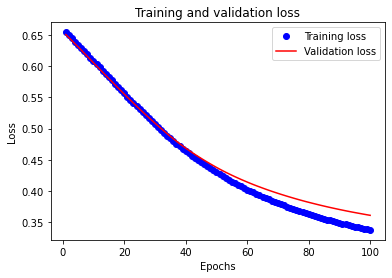

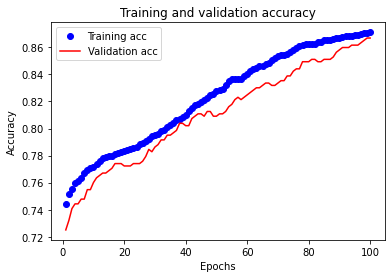

In [43]:

plt.clf()
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, (len(history_dict['loss']) + 1))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# VALIDATION ACCURACY curves

plt.clf()
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']
epochs = range(1, (len(history_dict['binary_accuracy']) + 1))
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [45]:

final_predictions = model.predict(X_test)
final_predictions.shape

(571, 1)

In [47]:
Preds = final_predictions.copy()
#print(len(Preds))
#print(Preds)
Preds[ np.where( Preds >= 0.5 ) ] = 1
Preds[ np.where( Preds < 0.5 ) ] = 0

In [48]:

conf_mx = confusion_matrix(y_test, Preds)

TN = conf_mx[0,0]
FP = conf_mx[0,1]
FN = conf_mx[1,0]
TP = conf_mx[1,1]

print ('TN: ', TN)
print ('FP: ', FP)
print ('FN: ', FN)
print ('TP: ', TP)

recall = TP/(TP+FN)
precision = TP/(TP+FP)

print (recall, precision)

TN:  406
FP:  16
FN:  60
TP:  89
0.5973154362416108 0.8476190476190476


In [49]:
def plot_confusion_matrix(cm,target_names,title='Confusion matrix',cmap=None,
                          normalize=False):
    import itertools
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

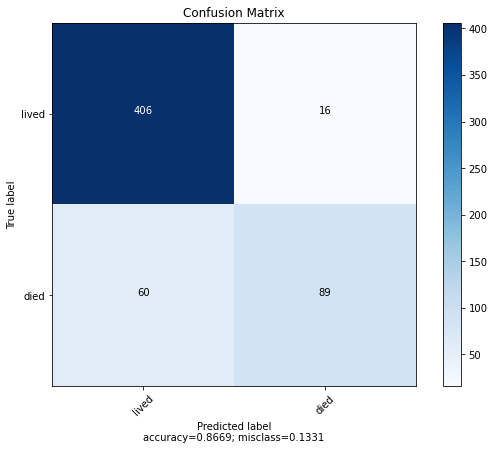

In [50]:
plot_confusion_matrix(conf_mx, 
                      normalize    = False,
                      target_names = ['lived', 'died'],
                      title        = "Confusion Matrix")

In [51]:
print ('precision ',precision_score(y_test, Preds))
print ('recall ',recall_score(y_test, Preds) )
print ('accuracy ',accuracy_score(y_test, Preds))
print ('F1 score ',f1_score(y_test, Preds))

precision  0.8476190476190476
recall  0.5973154362416108
accuracy  0.8669001751313485
F1 score  0.7007874015748032


AUC: 0.780


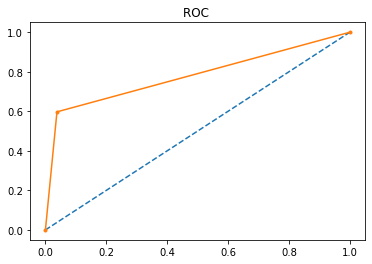

In [52]:
# calculate AUC

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, Preds)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, Preds)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.title('ROC ')
# show the plot
plt.show()

f1=0.701 ap=0.611


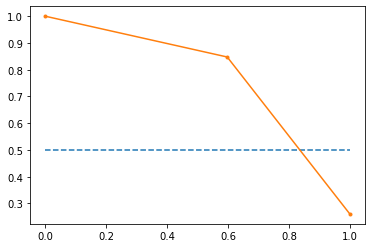

In [53]:
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, Preds)
# calculate F1 score
f1 = f1_score(y_test, Preds)
# calculate precision-recall AUC
#auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(y_test, Preds)
print('f1=%.3f ap=%.3f' % (f1, ap))
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the roc curve for the model
plt.plot(recall, precision, marker='.')
# show the plot
plt.show()